HINEILL DAVID CÉSPEDES ESPINOZA - 20213704

PREGUNTA 1

PREGUNTA 2

PREGUNTA 3

a) Determine las funciones de transferencia H(z) y G(z) asociadas a las respuestas al impulso h[n] y g[n],
respectivamente. Halle la ROC de ambas funciones de transferencia. (1 pto)

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import sympy as sym

In [93]:
#Calculamos Hz
z = sym.symbols('z')
k = sym.symbols('k',integer=True)
#Definimos suma
H_z  =  sym.Sum(   (  sym.Rational(3,10) **k )*(z)**(-k) + (  sym.Rational(7,10) **k )*(z)**(-k) , (k,0,sym.oo)) +  1 #Sumamos 1 por la deltaDirac
H_z_simplify = H_z.doit()
print(f"------------------FUNCION DE TRANSFERENCIA  H(Z) --------------------")
H_z_simplify
#Luego ploteamos

------------------FUNCION DE TRANSFERENCIA  H(Z) --------------------


Piecewise((1/(1 - 7/(10*z)), 1/Abs(z) < 10/7), (Sum(7**k/(10**k*z**k), (k, 0, oo)), True)) + Piecewise((1/(1 - 3/(10*z)), 1/Abs(z) < 10/3), (Sum(3**k/(10**k*z**k), (k, 0, oo)), True)) + 1

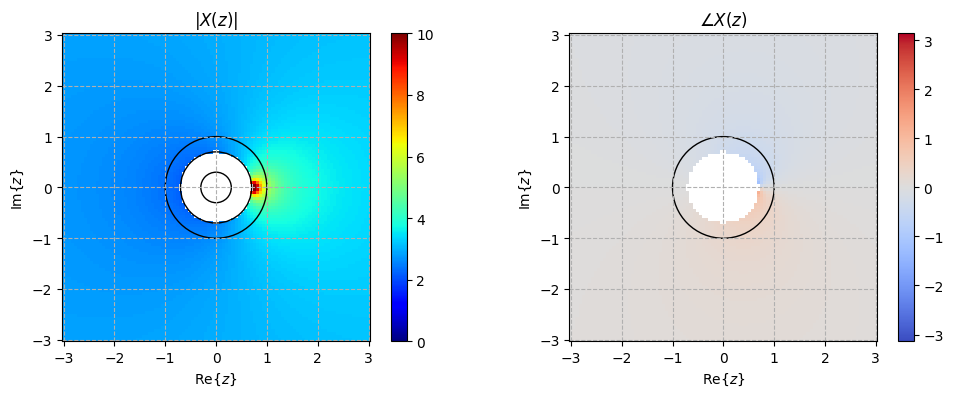

In [98]:
rz = np.linspace(-3,3,100)
iz = np.linspace(-3,3,100)

rr, ii = np.meshgrid(rz,iz)
zz = rr+1j*ii

ROC1 = np.abs(zz) > np.abs(0.3)
ROC2 = np.abs(zz) > np.abs(0.7)
ROC = np.logical_and(ROC1, ROC2)
H_Z =  1/(1-0.7 * (zz**-1)) + 1/(1-0.3 * (zz**-1)) + 1 #Escribimos una expresión
H_Z[~ROC] = np.NaN

#Ploteamos
fig = plt.figure(figsize=[12,4])
(ax1,ax2) = fig.subplots(1,2)
im = ax1.pcolormesh(rz,iz,np.abs(H_Z),cmap=cm.jet,shading='auto')
ax1.set_xlabel('$\mathrm{Re}\{z\}$')
ax1.set_ylabel('$\mathrm{Im}\{z\}$')
ax1.set_title('$|X(z)|$')
ax1.set_aspect(1)
ax1.grid('on',linestyle='--')
im.set_clim(0,10)
fig.colorbar(im,ax=ax1)

circ = plt.Circle((0, 0), radius=1, edgecolor='k', facecolor='None')
ax1.add_artist(circ)
circ = plt.Circle((0, 0), radius=0.3, edgecolor='k', facecolor='None')
ax1.add_artist(circ)
circ = plt.Circle((0, 0), radius=0.7, edgecolor='k', facecolor='None')
ax1.add_artist(circ)
im = ax2.pcolormesh(rz,iz,np.angle(H_Z),cmap=cm.coolwarm,shading='auto')
ax2.set_xlabel('$\mathrm{Re}\{z\}$')
ax2.set_ylabel('$\mathrm{Im}\{z\}$')
ax2.set_title('$\\angle X(z)$')
ax2.set_aspect(1)
ax2.grid('on',linestyle='--')
im.set_clim(-np.pi,np.pi)
fig.colorbar(im,ax=ax2)

circ = plt.Circle((0, 0), radius=1, edgecolor='k', facecolor='None')
ax2.add_artist(circ)

In [78]:
#Calculamos Gz 
z = sym.symbols('z')
k = sym.symbols('k',integer=True)
#Definimos suma
G_z  =  sym.Sum(   (  1 + (-1)**k )*(sym.Rational(12,10) **k)*(z)**(-k) + k*(  sym.Rational(9,10) **k )*(z)**(-k) , (k,0,sym.oo)) #Sumamos 1 por la deltaDirac
G_z = G_z.doit()
print(f"------------------FUNCION DE TRANSFERENCIA  G(Z) --------------------")
G_z

------------------FUNCION DE TRANSFERENCIA  G(Z) --------------------


Piecewise((9/(10*z*(1 - 9/(10*z))**2), 1/Abs(z) < 10/9), (Sum(9**k*k/(10**k*z**k), (k, 0, oo)), True)) + Piecewise((1/(1 - 6/(5*z)), 1/Abs(z) < 5/6), (Sum((6/5)**k/z**k, (k, 0, oo)), True)) + Piecewise((1/(1 + 6/(5*z)), 1/Abs(z) < 5/6), (Sum((-6/5)**k/z**k, (k, 0, oo)), True))

In [ ]:
#ANEXO DE FUNCIONES
